<a href="https://colab.research.google.com/github/leekate/2020-ctrc-OralCancer-Classification-project/blob/master/Oral_Detect_my_ResNet_Contrast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

!pip uninstall keras
!pip install Keras==2.2.4

!pip uninstall tensorflow
!pip install tensorflow==1.13.1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Original Data and Contrast

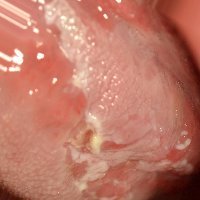

In [ ]:
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

example_img=cv2.imread("/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/train/1.Cancer/can_1.jpg_0_2811.jpg")
example_img=cv2.resize(example_img,dsize=(200,200),interpolation=cv2.INTER_LINEAR)

cv2_imshow(example_img)

In [ ]:
import cv2
def img_Contrast(img):
    # -----Converting image to LAB Color model----------------------------------- 
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) 
  
    # -----Splitting the LAB image to different channels------------------------- 
    l, a, b = cv2.split(lab) 
  
    # -----Applying CLAHE to L-channel------------------------------------------- 
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8)) 
    cl = clahe.apply(l) 
  
    # -----Merge the CLAHE enhanced L-channel with the a and b channel----------- 
    limg = cv2.merge((cl, a, b)) 
  
    # -----Converting image from LAB Color model to RGB model-------------------- 
    #final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR) 
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
    final=cv2.resize(final,dsize=(200,200),interpolation=cv2.INTER_LINEAR)
  
    
    # cv2_imshow(final)
    # cv.waitKey(0)
    # cv.destroyAllWindows()
    return final


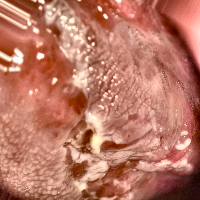

In [ ]:
example_img_contrast=img_Contrast(example_img)
cv2_imshow(example_img_contrast)

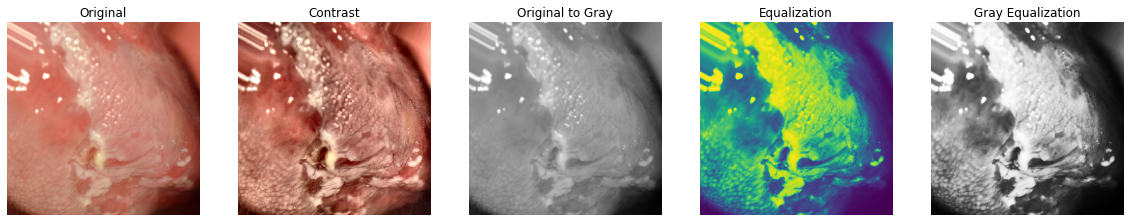

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt


#1
example_img=cv2.imread("/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/train/1.Cancer/can_1.jpg_0_2811.jpg")
example_img_ori = cv2.cvtColor(example_img,cv2.COLOR_BGR2RGB)

#2
example_img_contrast=img_Contrast(example_img)

#3
example_img_gray = cv2.cvtColor(example_img_ori,cv2.COLOR_RGB2GRAY)

#4
example_img_equalize=cv2.imread("/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/train/1.Cancer/can_1.jpg_0_2811.jpg",0)
example_img_equalize=cv2.equalizeHist(example_img_equalize)



plt.figure(figsize=(20,4))
imgae1=plt.subplot(1,5,1)
imgae1.set_title('Original')
plt.axis('off')
plt.imshow(example_img_ori)


imgae2=plt.subplot(1,5,2)
imgae2.set_title('Contrast')
plt.axis('off')
plt.imshow(example_img_contrast)


imgae3=plt.subplot(1,5,3)
imgae3.set_title('Original to Gray')
plt.axis('off')
plt.imshow(example_img_gray, cmap="gray")



imgae4=plt.subplot(1,5,4)
imgae4.set_title('Equalization')
plt.axis('off')
plt.imshow(example_img_equalize)


imgae5=plt.subplot(1,5,5)
imgae5.set_title('Gray Equalization')
plt.axis('off')
plt.imshow(example_img_equalize,cmap="gray")



plt.show()


## **Train**

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array, load_img

import os
import numpy as np
from PIL import Image

path1 = "/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/train/1.Cancer"

file_list = os.listdir(path1)

print ("file_list: {}".format(file_list))

n=len(file_list)
print("n=%d"%(n))
print(file_list[0])


file_list: ['can_1.jpg', 'can_2.jpg', 'can_3.jpg', 'can_4.jpg', 'can_5.jpg', 'can_6.jpg', 'can_8.jpg', 'can_9.jpg', 'can_10.jpg', 'can_11.jpg', 'can_12.jpg', 'can_13.jpg', 'can_14.jpg', 'can_15.jpg', 'can_15_1.jpg', 'can_16.jpg', 'can_17.jpg', 'can_17_1.jpg', 'can_18.jpg', 'can_19.jpg', 'can_20.jpg', 'can_21.jpg', 'can_22.jpg', 'can_22_1.jpg', 'can_23.jpg', 'can_24.jpg', 'can_25.jpg', 'can_26.jpg', 'can_27.jpg', 'can_28.jpg', 'can_30.jpg', 'can_29.jpg', 'can_31.jpg', 'can_32.jpg', 'can_32_1.jpg', 'can_33.jpg', 'can_34.jpg', 'can_35.jpg', 'can_36.jpg', 'can_37.jpg', 'can_37_1.jpg', 'can_38.jpg', 'can_39.jpg', 'can_40.jpg', 'can_40_1.jpg', 'can_41.jpg', 'can_42.jpg', 'can_43.jpg', 'can_44.jpg', 'can_51.jpg', 'can_52.jpg', 'can_53.jpg', 'can_53_1.jpg', 'can_53_2.jpg', 'can_55.jpg', 'can_54.jpg', 'can_57.jpg', 'can_56.jpg', 'can_58.jpg', 'can_59.jpg', 'can_59_1.jpg', 'can_59_2.jpg', 'can_63.jpg', 'can_60.jpg', 'can_60_1.jpg', 'can_62.jpg', 'can_61.jpg', 'can_61_1.jpg', 'can_45.jpg', 'can_4

In [ ]:
import cv2
def img_Contrast():
  
  for j in range(0,496):
    
    img = cv.imread('/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/train/1.Cancer/{}'.format(file_list[j]))
   
    # -----Converting image to LAB Color model----------------------------------- 
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) 
  
    # -----Splitting the LAB image to different channels------------------------- 
    l, a, b = cv2.split(lab) 
  
    # -----Applying CLAHE to L-channel------------------------------------------- 
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8)) 
    cl = clahe.apply(l) 
  
    # -----Merge the CLAHE enhanced L-channel with the a and b channel----------- 
    limg = cv2.merge((cl, a, b)) 
  
    # -----Converting image from LAB Color model to RGB model-------------------- 
    #final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR) 
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
    final=cv2.resize(final,dsize=(200,200),interpolation=cv2.INTER_LINEAR)

    
    cv.imwrite('/content/drive/Shareddrives/CTRC-OralDetect-Project/Generate-Contrast/train/1.Cancer/{}'.format(file_list[j]),final)
    cv2_imshow(final)
    cv.waitKey(0)
    cv.destroyAllWindows()

img_Contrast()

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array, load_img

import os
import numpy as np
from PIL import Image

path1 = "/content/drive/Shareddrives/CTRC-OralDetect-Project/Generate-Contrast/train/1.Cancer"

file_list = os.listdir(path1)

print ("file_list: {}".format(file_list))

n=len(file_list)
print("n=%d"%(n))
print(file_list[0])

file_list: ['can_1.jpg', 'can_2.jpg', 'can_3.jpg', 'can_4.jpg', 'can_5.jpg', 'can_6.jpg', 'can_8.jpg', 'can_9.jpg', 'can_10.jpg', 'can_11.jpg', 'can_12.jpg', 'can_13.jpg', 'can_14.jpg', 'can_15.jpg', 'can_15_1.jpg', 'can_16.jpg', 'can_17.jpg', 'can_17_1.jpg', 'can_18.jpg', 'can_19.jpg', 'can_20.jpg', 'can_21.jpg', 'can_22.jpg', 'can_22_1.jpg', 'can_23.jpg', 'can_24.jpg', 'can_25.jpg', 'can_26.jpg', 'can_27.jpg', 'can_28.jpg', 'can_30.jpg', 'can_29.jpg', 'can_31.jpg', 'can_32.jpg', 'can_32_1.jpg', 'can_33.jpg', 'can_34.jpg', 'can_35.jpg', 'can_36.jpg', 'can_37.jpg', 'can_37_1.jpg', 'can_38.jpg', 'can_39.jpg', 'can_40.jpg', 'can_40_1.jpg', 'can_41.jpg', 'can_42.jpg', 'can_43.jpg', 'can_44.jpg', 'can_51.jpg', 'can_52.jpg', 'can_53.jpg', 'can_53_1.jpg', 'can_53_2.jpg', 'can_55.jpg', 'can_54.jpg', 'can_57.jpg', 'can_56.jpg', 'can_58.jpg', 'can_59.jpg', 'can_59_1.jpg', 'can_59_2.jpg', 'can_63.jpg', 'can_60.jpg', 'can_60_1.jpg', 'can_62.jpg', 'can_61.jpg', 'can_61_1.jpg', 'can_45.jpg', 'can_4

In [ ]:
path2 = "/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/train/2.Precancer"

file_list = os.listdir(path2)

print ("file_list: {}".format(file_list))

n=len(file_list)
print("n=%d"%(n))
print(file_list[0])

file_list: ['precan_1.jpg', 'precan_2.jpg', 'precan_3.jpg', 'precan_4.jpg', 'precan_5.jpg', 'precan_6.jpg', 'precan_7.jpg', 'precan_8.jpg', 'precan_9.jpg', 'precan_10.jpg', 'precan_11.jpg', 'precan_12.jpg', 'precan_13.jpg', 'precan_14.jpg', 'precan_15.jpg', 'precan_16.jpg', 'precan_17.jpg', 'precan_18.jpg', 'precan_19.jpg', 'precan_20.jpg', 'precan_21.jpg', 'precan_22.jpg', 'precan_23.jpg', 'precan_24.jpg', 'precan_25.jpg', 'precan_26.jpg', 'precan_27.jpg', 'precan_28.jpg', 'precan_29.jpg', 'precan_30.jpg', 'precan_31.jpg', 'precan_32.jpg', 'precan_33.jpg', 'precan_34.jpg', 'precan_35.jpg', 'precan_36.jpg', 'precan_37.jpg', 'precan_38.jpg', 'precan_39.jpg', 'precan_40.jpg', 'precan_42.jpg', 'precan_43.jpg', 'precan_41.jpg', 'precan_44.jpg', 'precan_45.jpg', 'precan_46.jpg', 'precan_8.jpg_0_2718.jpg', 'precan_8.jpg_0_2004.jpg', 'precan_8.jpg_0_9166.jpg', 'precan_7.jpg_0_147.jpg', 'precan_7.jpg_0_8579.jpg', 'precan_7.jpg_0_1574.jpg', 'precan_6.jpg_0_3973.jpg', 'precan_6.jpg_0_4734.jpg', 

In [ ]:
import cv2
def img_Contrast2():
  
  for j in range(0,184):
    
    img = cv.imread('/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/train/2.Precancer/{}'.format(file_list[j]))
   
    # -----Converting image to LAB Color model----------------------------------- 
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) 
  
    # -----Splitting the LAB image to different channels------------------------- 
    l, a, b = cv2.split(lab) 
  
    # -----Applying CLAHE to L-channel------------------------------------------- 
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8)) 
    cl = clahe.apply(l) 
  
    # -----Merge the CLAHE enhanced L-channel with the a and b channel----------- 
    limg = cv2.merge((cl, a, b)) 
  
    # -----Converting image from LAB Color model to RGB model-------------------- 
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
    final=cv2.resize(final,dsize=(200,200),interpolation=cv2.INTER_LINEAR)
    
    cv.imwrite('/content/drive/Shareddrives/CTRC-OralDetect-Project/Generate-Contrast/train/2.Precancer/{}'.format(file_list[j]),final)
    cv2_imshow(final)
    cv.waitKey(0)
    cv.destroyAllWindows()

img_Contrast2()

In [ ]:
path2 = "/content/drive/Shareddrives/CTRC-OralDetect-Project/Generate-Contrast/train/2.Precancer"

file_list = os.listdir(path2)

print ("file_list: {}".format(file_list))

n=len(file_list)
print("n=%d"%(n))
print(file_list[0])

file_list: ['precan_1.jpg', 'precan_2.jpg', 'precan_3.jpg', 'precan_4.jpg', 'precan_5.jpg', 'precan_6.jpg', 'precan_7.jpg', 'precan_8.jpg', 'precan_9.jpg', 'precan_10.jpg', 'precan_11.jpg', 'precan_12.jpg', 'precan_13.jpg', 'precan_14.jpg', 'precan_15.jpg', 'precan_16.jpg', 'precan_17.jpg', 'precan_18.jpg', 'precan_19.jpg', 'precan_20.jpg', 'precan_21.jpg', 'precan_22.jpg', 'precan_23.jpg', 'precan_24.jpg', 'precan_25.jpg', 'precan_26.jpg', 'precan_27.jpg', 'precan_28.jpg', 'precan_29.jpg', 'precan_30.jpg', 'precan_31.jpg', 'precan_32.jpg', 'precan_33.jpg', 'precan_34.jpg', 'precan_35.jpg', 'precan_36.jpg', 'precan_37.jpg', 'precan_38.jpg', 'precan_39.jpg', 'precan_40.jpg', 'precan_42.jpg', 'precan_43.jpg', 'precan_41.jpg', 'precan_44.jpg', 'precan_45.jpg', 'precan_46.jpg', 'precan_8.jpg_0_2718.jpg', 'precan_8.jpg_0_2004.jpg', 'precan_8.jpg_0_9166.jpg', 'precan_7.jpg_0_147.jpg', 'precan_7.jpg_0_8579.jpg', 'precan_7.jpg_0_1574.jpg', 'precan_6.jpg_0_3973.jpg', 'precan_6.jpg_0_4734.jpg', 

In [ ]:
path3 = "/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/train/3.Inflammatory"

file_list = os.listdir(path3)

print ("file_list: {}".format(file_list))

n=len(file_list)
print("n=%d"%(n))
print(file_list[0])

file_list: ['inf_1.jpg', 'inf_2.jpg', 'inf_3.jpg', 'inf_4.jpg', 'inf_5.jpg', 'inf_5_1.jpg', 'inf_6.jpg', 'inf_6_1.jpg', 'inf_7.jpg', 'inf_8.jpg', 'inf_9.jpg', 'inf_10.jpg', 'inf_11.jpg', 'inf_11_1.jpg', 'inf_12.jpg', 'inf_13.jpg', 'inf_13_1.jpg', 'inf_14.jpg', 'inf_14_1.jpg', 'inf_15.jpg', 'inf_16.jpg', 'inf_17.jpg', 'inf_18.jpg', 'inf_19.jpg', 'inf_20.jpg', 'inf_21.jpg', 'inf_22.jpg', 'inf_23.jpg', 'inf_23_1.jpg', 'inf_24.jpg', 'inf_24_1.jpg', 'inf_25.jpg', 'inf_25_1.jpg', 'inf_25_2.jpg', 'inf_26.jpg', 'inf_27.jpg', 'inf_28.jpg', 'inf_29.jpg', 'inf_30.jpg', 'inf_31.jpg', 'inf_32.jpg', 'inf_33.jpg', 'inf_34.jpg', 'inf_35.jpg', 'inf_36.jpg', 'inf_37.jpg', 'inf_38.jpg', 'inf_39.jpg', 'inf_40.jpg', 'inf_41.jpg', 'inf_42.jpg', 'inf_43.jpg', 'inf_44.jpg', 'inf_45.jpg', 'inf_45_1.jpg', 'inf_46.jpg', 'inf_47.jpg', 'inf_48.jpg', 'inf_49.jpg', 'inf_50.jpg', 'inf_51.jpg', 'inf_52.jpg', 'inf_53.jpg', 'inf_54.jpg', 'inf_55.jpg', 'inf_56.jpg', 'inf_57.jpg', 'inf_58.jpg', 'inf_59.jpg', 'inf_60.jpg',

In [ ]:
import cv2
def img_Contrast3():
  
  for j in range(0,316):
    
    img = cv.imread('/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/train/3.Inflammatory/{}'.format(file_list[j]))
   
    # -----Converting image to LAB Color model----------------------------------- 
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) 
  
    # -----Splitting the LAB image to different channels------------------------- 
    l, a, b = cv2.split(lab) 
  
    # -----Applying CLAHE to L-channel------------------------------------------- 
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8)) 
    cl = clahe.apply(l) 
  
    # -----Merge the CLAHE enhanced L-channel with the a and b channel----------- 
    limg = cv2.merge((cl, a, b)) 
  
    # -----Converting image from LAB Color model to RGB model-------------------- 
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
    final=cv2.resize(final,dsize=(200,200),interpolation=cv2.INTER_LINEAR)
    
    cv.imwrite('/content/drive/Shareddrives/CTRC-OralDetect-Project/Generate-Contrast/train/.Inflammatory/{}'.format(file_list[j]),final)
    cv2_imshow(final)
    cv.waitKey(0)
    cv.destroyAllWindows()

img_Contrast3()

In [ ]:
path4 = "/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/train/4.Normal"

file_list = os.listdir(path4)

print ("file_list: {}".format(file_list))

n=len(file_list)
print("n=%d"%(n))
print(file_list[0])

file_list: ['nor_232_2.jpg', 'nor_232_4.jpg', 'nor_231_6.jpg', 'nor_231_5.jpg', 'nor_233_2.jpg', 'nor_232_5.jpg', 'nor_233_1.jpg', 'nor_233.jpg', 'nor_233_3.jpg', 'nor_234.jpg', 'nor_233_4.jpg', 'nor_233_6.jpg', 'nor_233_5.jpg', 'nor_234_2.jpg', 'nor_234_1.jpg', 'nor_234_3.jpg', 'nor_234_4.jpg', 'nor_234_6.jpg', 'nor_234_7.jpg', 'nor_234_5.jpg', 'nor_235_1.jpg', 'nor_235_3.jpg', 'nor_235_2.jpg', 'nor_235.jpg', 'nor_235_5.jpg', 'nor_235_4.jpg', 'nor_236.jpg', 'nor_236_1.jpg', 'nor_235_6.jpg', 'nor_237_1.jpg', 'nor_236_2.jpg', 'nor_237_2.jpg', 'nor_236_3.jpg', 'nor_237.jpg', 'nor_237_5.jpg', 'nor_237_4.jpg', 'nor_237_3.jpg', 'nor_238_3.jpg', 'nor_238.jpg', 'nor_238_1.jpg', 'nor_238_2.jpg', 'nor_239_3.jpg', 'nor_238_4.jpg', 'nor_239.jpg', 'nor_239_2.jpg', 'nor_239_1.jpg', 'nor_239_4.jpg', 'nor_239_6.jpg', 'nor_239_5.jpg', 'nor_240_1.jpg', 'nor_240_3.jpg', 'nor_240_2.jpg', 'nor_240.jpg', 'nor_240_4.jpg', 'nor_241_2.jpg', 'nor_241_1.jpg', 'nor_240_5.jpg', 'nor_241.jpg', 'nor_241_3.jpg', 'no

In [ ]:
import cv2
def img_Contrast4():
  
  for j in range(0,1365):
    
    img = cv.imread('/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/train/4.Normal/{}'.format(file_list[j]))
   
    # -----Converting image to LAB Color model----------------------------------- 
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) 
  
    # -----Splitting the LAB image to different channels------------------------- 
    l, a, b = cv2.split(lab) 
  
    # -----Applying CLAHE to L-channel------------------------------------------- 
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8)) 
    cl = clahe.apply(l) 
  
    # -----Merge the CLAHE enhanced L-channel with the a and b channel----------- 
    limg = cv2.merge((cl, a, b)) 
  
    # -----Converting image from LAB Color model to RGB model-------------------- 
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2RGB)
    final=cv2.resize(final,dsize=(200,200),interpolation=cv2.INTER_LINEAR)
    
    cv.imwrite('/content/drive/Shareddrives/CTRC-OralDetect-Project/Generate-Contrast/train/2.Precancer/{}'.format(file_list[j]),final)
    cv2_imshow(final)
    cv.waitKey(0)
    cv.destroyAllWindows()

img_Contrast4()

# 여기서부터 실행해야 정상 전처리

## **Validation histogram**

In [ ]:
path5 = "/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/validation/1.Cancer"

file_list = os.listdir(path5)

print ("file_list: {}".format(file_list))

n=len(file_list)
print("n=%d"%(n))
print(file_list[0])

In [ ]:
import cv2
def img_Contrast5():
  
  for j in range(0,143):
    
    img = cv.imread('/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/validation/1.Cancer/{}'.format(file_list[j]))
   
    # -----Converting image to LAB Color model----------------------------------- 
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) 
  
    # -----Splitting the LAB image to different channels------------------------- 
    l, a, b = cv2.split(lab) 
  
    # -----Applying CLAHE to L-channel------------------------------------------- 
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8)) 
    cl = clahe.apply(l) 
  
    # -----Merge the CLAHE enhanced L-channel with the a and b channel----------- 
    limg = cv2.merge((cl, a, b)) 
  
    # -----Converting image from LAB Color model to RGB model-------------------- 
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR) 
    
    cv.imwrite('/content/drive/Shareddrives/CTRC-OralDetect-Project/Generate-Contrast/validation/1.Cancer/{}'.format(file_list[j]),final)
    cv2_imshow(final)
    cv.waitKey(0)
    cv.destroyAllWindows()

img_Contrast5()

In [ ]:
path6 = "/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/validation/2.Precancer"

file_list = os.listdir(path6)

print ("file_list: {}".format(file_list))

n=len(file_list)
print("n=%d"%(n))
print(file_list[0])

file_list: ['precan_47.jpg', 'precan_48.jpg', 'precan_49.jpg', 'precan_50.jpg', 'precan_51.jpg', 'precan_52.jpg', 'precan_53.jpg', 'precan_54.jpg', 'precan_55.jpg', 'precan_56.jpg', 'precan_57.jpg', 'precan_58.jpg', 'precan_59.jpg', 'precan_60.jpg', 'precan_62.jpg', 'precan_61.jpg', 'precan_63.jpg', 'precan_64.jpg', 'precan_65.jpg', 'precan_66.jpg', 'precan_67.jpg', 'precan_68.jpg', 'precan_69.jpg', 'precan_70.jpg', 'precan_71.jpg', 'precan_72.jpg', 'precan_73.jpg', 'precan_73_1.jpg', 'precan_74.jpg', 'precan_75.jpg', 'precan_75_1.jpg', 'precan_76.jpg', 'precan_77.jpg', 'precan_78.jpg', 'precan_79.jpg', 'precan_80.jpg', 'precan_81.jpg', 'precan_81_1.jpg', 'precan_82.jpg', 'precan_83.jpg', 'precan_84.jpg', 'precan_85.jpg', 'precan_86.jpg', 'precan_87.jpg', 'precan_88.jpg', 'precan_89.jpg', 'precan_90.jpg', 'precan_91.jpg', 'precan_92.jpg', 'precan_93.jpg', 'precan_94.jpg', 'precan_95.jpg']
n=52
precan_47.jpg


In [ ]:
import cv2
def img_Contrast6():
  
  for j in range(0,52):
    
    img = cv.imread('/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/validation/2.Precancer/{}'.format(file_list[j]))
   
    # -----Converting image to LAB Color model----------------------------------- 
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) 
  
    # -----Splitting the LAB image to different channels------------------------- 
    l, a, b = cv2.split(lab) 
  
    # -----Applying CLAHE to L-channel------------------------------------------- 
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8)) 
    cl = clahe.apply(l) 
  
    # -----Merge the CLAHE enhanced L-channel with the a and b channel----------- 
    limg = cv2.merge((cl, a, b)) 
  
    # -----Converting image from LAB Color model to RGB model-------------------- 
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR) 
    
    cv.imwrite('/content/drive/Shareddrives/CTRC-OralDetect-Project/Generate-Contrast/validation/2.Precancer/{}'.format(file_list[j]),final)
    cv2_imshow(final)
    cv.waitKey(0)
    cv.destroyAllWindows()

img_Contrast6()

In [ ]:
path7 = "/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/validation/3.Inflammatory"

file_list = os.listdir(path7)

print ("file_list: {}".format(file_list))

n=len(file_list)
print("n=%d"%(n))
print(file_list[0])

In [ ]:
import cv2
def img_Contrast7():
  
  for j in range(0,93):
    
    img = cv.imread('/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/validation/3.Inflammatory/{}'.format(file_list[j]))
   
    # -----Converting image to LAB Color model----------------------------------- 
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) 
  
    # -----Splitting the LAB image to different channels------------------------- 
    l, a, b = cv2.split(lab) 
  
    # -----Applying CLAHE to L-channel------------------------------------------- 
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8)) 
    cl = clahe.apply(l) 
  
    # -----Merge the CLAHE enhanced L-channel with the a and b channel----------- 
    limg = cv2.merge((cl, a, b)) 
  
    # -----Converting image from LAB Color model to RGB model-------------------- 
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR) 
    
    cv.imwrite('/content/drive/Shareddrives/CTRC-OralDetect-Project/Generate-Contrast/validation/3.Inflammatory/{}'.format(file_list[j]),final)
    cv2_imshow(final)
    cv.waitKey(0)
    cv.destroyAllWindows()

img_Contrast7()

In [ ]:
path8 = "/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/validation/4.Normal"

file_list = os.listdir(path8)

print ("file_list: {}".format(file_list))

n=len(file_list)
print("n=%d"%(n))
print(file_list[0])

In [ ]:
import cv2
def img_Contrast8():
  
  for j in range(0,341):
    
    img = cv.imread('/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/validation/4.Normal/{}'.format(file_list[j]))
   
    # -----Converting image to LAB Color model----------------------------------- 
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) 
  
    # -----Splitting the LAB image to different channels------------------------- 
    l, a, b = cv2.split(lab) 
  
    # -----Applying CLAHE to L-channel------------------------------------------- 
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8)) 
    cl = clahe.apply(l) 
  
    # -----Merge the CLAHE enhanced L-channel with the a and b channel----------- 
    limg = cv2.merge((cl, a, b)) 
  
    # -----Converting image from LAB Color model to RGB model-------------------- 
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR) 
    
    cv.imwrite('/content/drive/Shareddrives/CTRC-OralDetect-Project/Generate-Contrast/validation/4.Normal/{}'.format(file_list[j]),final)
    cv2_imshow(final)
    cv.waitKey(0)
    cv.destroyAllWindows()

img_Contrast8()

## **Test histogram**


In [ ]:
path9 = "/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/test/1.Cancer"

file_list = os.listdir(path9)

print ("file_list: {}".format(file_list))

n=len(file_list)
print("n=%d"%(n))
print(file_list[0])

In [ ]:
import cv2
def img_Contrast9():
  
  for j in range(0,143):
    
    img = cv.imread('/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/test/1.Cancer/{}'.format(file_list[j]))
   
    # -----Converting image to LAB Color model----------------------------------- 
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) 
  
    # -----Splitting the LAB image to different channels------------------------- 
    l, a, b = cv2.split(lab) 
  
    # -----Applying CLAHE to L-channel------------------------------------------- 
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8)) 
    cl = clahe.apply(l) 
  
    # -----Merge the CLAHE enhanced L-channel with the a and b channel----------- 
    limg = cv2.merge((cl, a, b)) 
  
    # -----Converting image from LAB Color model to RGB model-------------------- 
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR) 
    
    cv.imwrite('/content/drive/Shareddrives/CTRC-OralDetect-Project/Generate-Contrast/test/1.Cancer/{}'.format(file_list[j]),final)
    cv2_imshow(final)
    cv.waitKey(0)
    cv.destroyAllWindows()

img_Contrast9()

In [ ]:
path10 = "/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/test/2.Precancer"

file_list = os.listdir(path10)

print ("file_list: {}".format(file_list))

n=len(file_list)
print("n=%d"%(n))
print(file_list[0])

In [ ]:
import cv2
def img_Contrast10():
  
  for j in range(0,52):
    
    img = cv.imread('/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/test/2.Precancer/{}'.format(file_list[j]))
   
    # -----Converting image to LAB Color model----------------------------------- 
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) 
  
    # -----Splitting the LAB image to different channels------------------------- 
    l, a, b = cv2.split(lab) 
  
    # -----Applying CLAHE to L-channel------------------------------------------- 
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8)) 
    cl = clahe.apply(l) 
  
    # -----Merge the CLAHE enhanced L-channel with the a and b channel----------- 
    limg = cv2.merge((cl, a, b)) 
  
    # -----Converting image from LAB Color model to RGB model-------------------- 
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR) 
    
    cv.imwrite('/content/drive/Shareddrives/CTRC-OralDetect-Project/Generate-Contrast/test/2.Precancer/{}'.format(file_list[j]),final)
    cv2_imshow(final)
    cv.waitKey(0)
    cv.destroyAllWindows()

img_Contrast10()

In [ ]:
path11 = "/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/test/3.Inflammatory"

file_list = os.listdir(path11)

print ("file_list: {}".format(file_list))

n=len(file_list)
print("n=%d"%(n))
print(file_list[0])

In [ ]:
import cv2
def img_Contrast11():
  
  for j in range(0,93):
    
    img = cv.imread('/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/test/3.Inflammatory/{}'.format(file_list[j]))
   
    # -----Converting image to LAB Color model----------------------------------- 
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) 
  
    # -----Splitting the LAB image to different channels------------------------- 
    l, a, b = cv2.split(lab) 
  
    # -----Applying CLAHE to L-channel------------------------------------------- 
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8)) 
    cl = clahe.apply(l) 
  
    # -----Merge the CLAHE enhanced L-channel with the a and b channel----------- 
    limg = cv2.merge((cl, a, b)) 
  
    # -----Converting image from LAB Color model to RGB model-------------------- 
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR) 
    
    cv.imwrite('/content/drive/Shareddrives/CTRC-OralDetect-Project/Generate-Contrast/test/3.Inflammatory/{}'.format(file_list[j]),final)
    cv2_imshow(final)
    cv.waitKey(0)
    cv.destroyAllWindows()

img_Contrast11()

In [ ]:
path12 = "/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/test/4.Normal"

file_list = os.listdir(path12)

print ("file_list: {}".format(file_list))

n=len(file_list)
print("n=%d"%(n))
print(file_list[0])

In [ ]:
import cv2
def img_Contrast12():
  
  for j in range(0,341):
    
    img = cv.imread('/content/drive/Shareddrives/CTRC-OralDetect-Project/OriginDataGenerate/test/4.Normal/{}'.format(file_list[j]))
   
    # -----Converting image to LAB Color model----------------------------------- 
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB) 
  
    # -----Splitting the LAB image to different channels------------------------- 
    l, a, b = cv2.split(lab) 
  
    # -----Applying CLAHE to L-channel------------------------------------------- 
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8)) 
    cl = clahe.apply(l) 
  
    # -----Merge the CLAHE enhanced L-channel with the a and b channel----------- 
    limg = cv2.merge((cl, a, b)) 
  
    # -----Converting image from LAB Color model to RGB model-------------------- 
    final = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR) 
    
    cv.imwrite('/content/drive/Shareddrives/CTRC-OralDetect-Project/Generate-Contrast/test/4.Normal/{}'.format(file_list[j]),final)
    cv2_imshow(final)
    cv.waitKey(0)
    cv.destroyAllWindows()

img_Contrast12()

# 본격적인 설계 시작
## ResNet

In [ ]:
from tensorflow.keras.applications import ResNet50

conv_base=ResNet50(weights='imagenet',
                include_top=False,
                input_shape=(150,150,3))

94773248/94765736 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import optimizers, initializers, regularizers, metrics



model=models.Sequential()
model.add(conv_base)



model.add(layers.Dense(2048, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(2048, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add( MaxPooling2D((2,2), padding='same'))




model.add(layers.Dense(1024, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(1024, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(1024, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(1024, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(1024, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(1024, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(1024, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))




model.add(layers.Dense(512, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(512, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(512, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(512, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(512, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(512, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(512, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(512, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(512, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(512, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(512, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(512, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))





model.add(layers.Dense(256, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(256, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(256, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(256, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(256, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(256, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(256, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(256, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(256, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(256, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(256, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(256, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(256, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(256, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(256, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(256, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(256, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(256, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))









model.add(layers.Dense(128, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(128, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(128, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(128, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(128, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(128, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))
model.add(layers.Dense(128, kernel_regularizer = regularizers.l2
                                  (0.001),activation='relu'))




model.add(Flatten()) 
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(4,activation='relu'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
conv_base.trainable=False
#weight가 업데이트되지 않도록

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 5, 5, 2048)        23587712  
_________________________________________________________________
dense (Dense)                (None, 5, 5, 2048)        4196352   
_________________________________________________________________
dense_1 (Dense)              (None, 5, 5, 2048)        4196352   
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 2048)        0         
_________________________________________________________________
dense_2 (Dense)              (None, 3, 3, 1024)        2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 3, 3, 1024)        1049600   
_________________________________________________________________
dense_4 (Dense)              (None, 3, 3, 1024)        1

## Training

In [ ]:
from keras.models import load_model
import os
# model checkpoint
model_sav_path = '/content/drive/Shareddrives/CTRC-OralDetect-Project/jiwoo_model/ResNet50'

if not os.path.isdir(model_sav_path):
    os.mkdir(model_sav_path)
    
model_path = model_sav_path + 'my_Resnet_model.h5'


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras
early_stopping = EarlyStopping()

callbacks=[tensorflow.keras.callbacks.TensorBoard(
    log_dir=model_path,
    histogram_freq=1,
    embeddings_freq=1,),
    early_stopping]



# callbacks=[tensorflow.keras.callbacks.TensorBoard(
#     log_dir='my_log_dir',
#     histogram_freq=1,
#     embeddings_freq=1,),
#     early_stopping]


In [ ]:
train_dir='/content/drive/Shareddrives/CTRC-OralDetect-Project/NewDataGenerate-HM/train'
validation_dir='/content/drive/Shareddrives/CTRC-OralDetect-Project/NewDataGenerate-HM/validation'
test_dir='/content/drive/Shareddrives/CTRC-OralDetect-Project/NewDataGenerate-HM/test'

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array, load_img
import numpy as np

np.random.seed(3)

imageGenerator = ImageDataGenerator(rescale=1./255)
trainGen = imageGenerator.flow_from_directory(train_dir,
                                              target_size=(150,150))
                                            

validationGen = imageGenerator.flow_from_directory(validation_dir,
                                              target_size=(150,150))
                                              
testGen = imageGenerator.flow_from_directory(test_dir,
                                              target_size=(150,150))
                                            
                                    

Found 2361 images belonging to 4 classes.
Found 629 images belonging to 4 classes.
Found 629 images belonging to 4 classes.


* steps_per_epoch : 한 epoch에 사용한 스텝 수를 지정합니다. 총 2361개의 훈련 샘플이 있고 배치사이즈가 32이므로 73 스텝으로 지정합니다.
* validation_data : 검증데이터셋을 제공할 제네레이터를 지정합니다. 여기서는 앞서 생성한 validation_generator으로 지정합니다.
* validation_steps : 한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝 수를 지정합니다. 총 629개의 검증 샘플이 있고 배치사이즈가 32이므로 19 스텝으로 지정합니다.
* epochs : 전체 훈련 데이터셋에 대해 학습 반복 횟수를 지정합니다. 50번을 반복적으로 학습시켜 보겠습니다.


In [ ]:
history=model.fit_generator(trainGen,steps_per_epoch=73, epochs=50,
                  validation_data=validationGen,validation_steps=19,
                           callbacks=callbacks)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
73/73 [==============================] - 857s 12s/step - loss: 21.8084 - accuracy: 0.4813 - val_loss: 15.5840 - val_accuracy: 0.5477
Epoch 2/50
73/73 [==============================] - 33s 448ms/step - loss: 14.9132 - accuracy: 0.6123 - val_loss: 14.1627 - val_accuracy: 0.5395
Epoch 3/50
73/73 [==============================] - 33s 447ms/step - loss: 13.6839 - accuracy: 0.6291 - val_loss: 13.2238 - val_accuracy: 0.5411
Epoch 4/50
73/73 [==============================] - 33s 448ms/step - loss: 12.9568 - accuracy: 0.5962 - val_loss: 12.5467 - val_accuracy: 0.5395
Epoch 5/50
73/73 [==============================] - 32s 442ms/step - loss: 12.2611 - accuracy: 0.5906 - val_loss: 12.0661 - val_accuracy: 0.2286
Epoch 6/50
73/73 [==============================] - 32s 439ms/step - loss: 11.5932 - accuracy: 0.6462 - val_loss: 11.4750 - val_accuracy: 0.5345
Epoch 7/50
73/73 [==============================] - 32s 439ms/step - loss: 11.1741 - accuracy: 0.6145 - val_loss: 11.1340 - val_acc

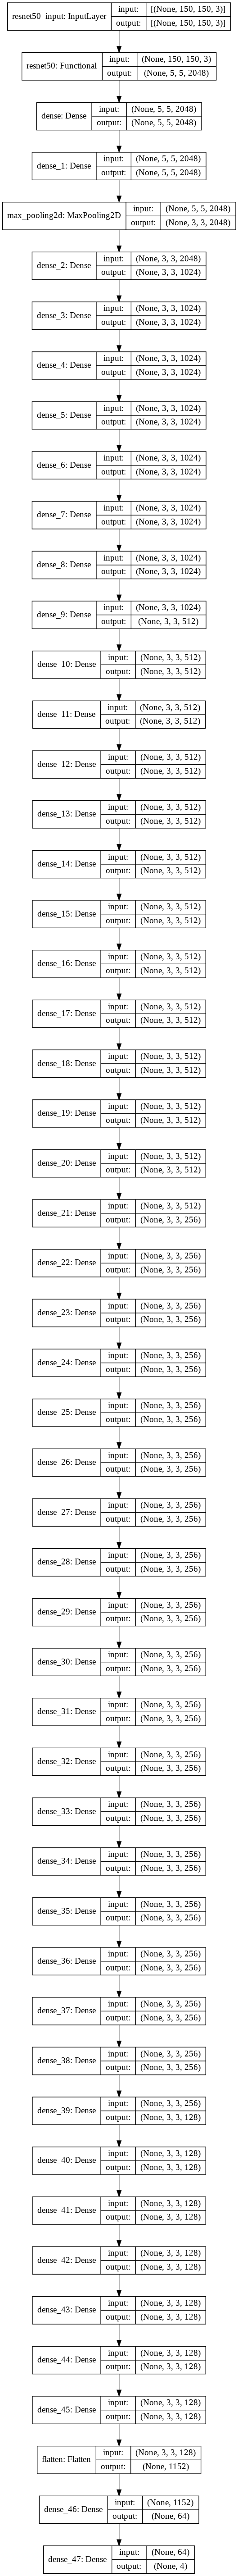

In [ ]:
from keras.utils import plot_model
from keras.models import load_model
#model = load_model('/content/drive/Shareddrives/CTRC/jiwoo_model/ResNet50/my_Resnet_model.h5')
plot_model(model,show_shapes=True,to_file='my_Resnet_model.png') 

# Testing

In [ ]:
#model= load_model('/content/drive/Shareddrives/CTRC/jiwoo_model/Resnet50/my_Resnet_model.h5')

In [ ]:
import matplotlib.pyplot as plt

#predict=model.predict(#validationData의 feature)
predict=model.predict(testGen)

In [ ]:
predict

array([[3271.483  , 1369.1199 , 2487.8464 , 5436.8994 ],
       [2951.1792 ,  798.29285, 2000.6693 , 3920.3123 ],
       [6390.667  , 2408.659  , 4320.2627 , 4627.2417 ],
       ...,
       [4375.3853 , 1125.3683 , 2379.8306 , 2443.75   ],
       [ 970.43396,  383.9484 , 1049.3953 , 3407.1826 ],
       [5325.2256 , 1391.0165 , 2821.6882 , 4109.665  ]], dtype=float32)

## Result

### 정확도 및 손실 그래프

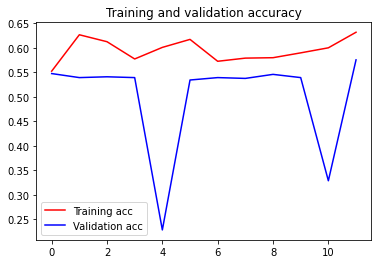

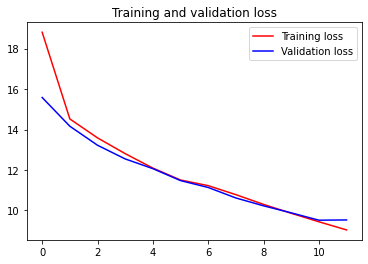

In [ ]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()




# import matplotlib.pyplot as plt


# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'r', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.legend()

# plt.figure()

# plt.plot(epochs, loss, 'r', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()

# plt.show()

# 알고리즘 CNN
* 심층 신경망(DNN, Deep Neural Network)
* 합성곱 신경망(CNN, Convoultional Neural Network)
* 순환 신경망(RNN, Recurrent Neural Network)
* 제한 볼츠만 머신(RBM, Restricted Boltzmann Machine)
* 심층 신뢰 신경망(DBN, Deep Belief Network)



CNN. 합성곱신경망 [Convolutional Neural Network]

CNN은 하나 이상의 합성곱 계층과 그 위에 올려진 일반적인 인공 신경망 계층들로 이루어져 있고, 가중치와 레이어들을 추가로 활용한다. 이러한 구조로 CNN은 2차원 구조의 입력 데이터를 충분히 활용할 수 있다. 다른 딥러닝 구조들과 비교했을 때, CNN은 영상과 음성 분야 모두에서 좋은 성능을 보인다. 또한 표준 역전달을 통해 훈련될 수 있고, 적은 수의 매개변수를 사용한다는 이점이 있다. 

 CNN은 마지막 레이어에 손실 함수를 가지며, 우리가 일반 신경망을 학습시킬 때 사용하던 각종 기법들을 동일하게 적용할 수 있다. CNN은 이미지 및 비디오 인식, 추천 시스템 및 자연 언어 처리 등에 응용된다.

# 텐서플로우의 시각화 프레임워크

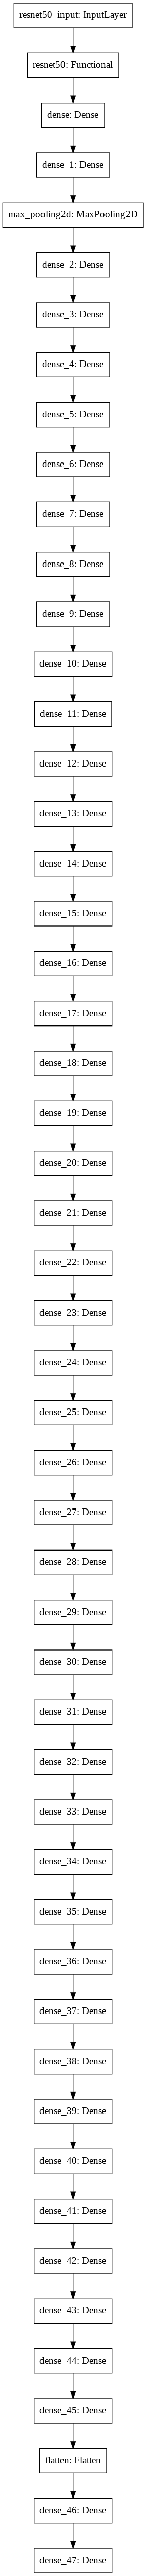

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=my_log_dir

# 최대 epoch
```
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
```
성능이 증가하지 않는다고, 그 순간 바로 멈추는 것은 효과적이지않을 수 있다. patience 는 성능이 증가하지 않는 epoch 을 몇 번이나 허용할 것인가를 정의


# ROC & 정밀도 및 재현율

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred = y_pred = model.predict(X_test)

# 분류결과표 - 정답 : 행 / 예측 : 열
confusion_matrix(y_pred, y_test)

# 오분류표
classification_report(y_pred, y_test)

# 분류정확도
accuracy_score(y_pred, y_test)

NameError: ignored